# KNN Regression


In [1]:
import numpy as np
import pandas as pd

#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

'''
Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. 
For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], 
or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling 
to the test set for meaningful results. You can use StandardScaler for standardization.
'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)



In [2]:
X_train.shape

(354, 13)

In [3]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()

# n_neighbors: Number of neighbors 
# weight: ‘uniform’ : uniform weights. ‘distance’ : weight points by the inverse of their distance.
# p Power parameter for the Minkowski metric.
# n_job:  number of parallel jobs to run (-1)

parameters = {'n_neighbors': np.arange(5, 30)
              ,'p': [1,2,3]
            }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 50, scoring ='r2')#,https://scikit-learn.org/stable/modules/model_evaluation.html 
#with no params it reduces to a CV
#'neg_mean_absolute_error',
#'neg_mean_squared_error'
# 'r2'

gs = gs.fit(X_train,y_train)



Fitting 3 folds for each of 75 candidates, totalling 225 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] n_neighbors=5, p=1 ..............................................
[CV] .................. n_neighbors=5, p=1, score=0.715, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] .................. n_neighbors=5, p=1, score=0.752, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] .................. n_neighbors=5, p=1, score=0.618, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=5, p=2 ..............................................
[CV] .................. n_neighbors=5, p=2, score=0.755, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

[CV] .................. n_neighbors=9, p=1, score=0.770, total=   0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.4s remaining:    0.0s
[CV] n_neighbors=9, p=1 ..............................................
[CV] .................. n_neighbors=9, p=1, score=0.726, total=   0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.4s remaining:    0.0s
[CV] n_neighbors=9, p=1 ..............................................
[CV] .................. n_neighbors=9, p=1, score=0.621, total=   0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.4s remaining:    0.0s
[CV] n_neighbors=9, p=2 ..............................................
[CV] .................. n_neighbors=9, p=2, score=0.784, total=   0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s remaining:    0.0s
[CV] n_neighbors=9, p=2 ..............................................
[CV] .................. n_neighbors=9, p=2, score=0.722, total=   0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41

[CV] ................. n_neighbors=14, p=3, score=0.731, total=   0.0s
[CV] n_neighbors=14, p=3 .............................................
[CV] ................. n_neighbors=14, p=3, score=0.670, total=   0.0s
[CV] n_neighbors=14, p=3 .............................................
[CV] ................. n_neighbors=14, p=3, score=0.660, total=   0.0s
[CV] n_neighbors=15, p=1 .............................................
[CV] ................. n_neighbors=15, p=1, score=0.748, total=   0.0s
[CV] n_neighbors=15, p=1 .............................................
[CV] ................. n_neighbors=15, p=1, score=0.683, total=   0.0s
[CV] n_neighbors=15, p=1 .............................................
[CV] ................. n_neighbors=15, p=1, score=0.607, total=   0.0s
[CV] n_neighbors=15, p=2 .............................................
[CV] ................. n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] n_neighbors=15, p=2 .............................................
[CV] .

[CV] ................. n_neighbors=21, p=3, score=0.619, total=   0.0s
[CV] n_neighbors=22, p=1 .............................................
[CV] ................. n_neighbors=22, p=1, score=0.716, total=   0.0s
[CV] n_neighbors=22, p=1 .............................................
[CV] ................. n_neighbors=22, p=1, score=0.622, total=   0.0s
[CV] n_neighbors=22, p=1 .............................................
[CV] ................. n_neighbors=22, p=1, score=0.572, total=   0.0s
[CV] n_neighbors=22, p=2 .............................................
[CV] ................. n_neighbors=22, p=2, score=0.707, total=   0.0s
[CV] n_neighbors=22, p=2 .............................................
[CV] ................. n_neighbors=22, p=2, score=0.641, total=   0.0s
[CV] n_neighbors=22, p=2 .............................................
[CV] ................. n_neighbors=22, p=2, score=0.623, total=   0.0s
[CV] n_neighbors=22, p=3 .............................................
[CV] .

[CV] ................. n_neighbors=28, p=3, score=0.658, total=   0.0s
[CV] n_neighbors=28, p=3 .............................................
[CV] ................. n_neighbors=28, p=3, score=0.598, total=   0.0s
[CV] n_neighbors=28, p=3 .............................................
[CV] ................. n_neighbors=28, p=3, score=0.581, total=   0.0s
[CV] n_neighbors=29, p=1 .............................................
[CV] ................. n_neighbors=29, p=1, score=0.671, total=   0.0s
[CV] n_neighbors=29, p=1 .............................................
[CV] ................. n_neighbors=29, p=1, score=0.590, total=   0.0s
[CV] n_neighbors=29, p=1 .............................................
[CV] ................. n_neighbors=29, p=1, score=0.533, total=   0.0s
[CV] n_neighbors=29, p=2 .............................................
[CV] ................. n_neighbors=29, p=2, score=0.673, total=   0.0s
[CV] n_neighbors=29, p=2 .............................................
[CV] .

In [8]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.725690 using {'n_neighbors': 5, 'p': 3}
0.695133 (0.056510) with: {'n_neighbors': 5, 'p': 1}
0.723768 (0.050367) with: {'n_neighbors': 5, 'p': 2}
0.725690 (0.038784) with: {'n_neighbors': 5, 'p': 3}
0.703618 (0.046350) with: {'n_neighbors': 6, 'p': 1}
0.720302 (0.047310) with: {'n_neighbors': 6, 'p': 2}
0.723766 (0.029903) with: {'n_neighbors': 6, 'p': 3}
0.700020 (0.057228) with: {'n_neighbors': 7, 'p': 1}
0.725070 (0.049286) with: {'n_neighbors': 7, 'p': 2}
0.723133 (0.032937) with: {'n_neighbors': 7, 'p': 3}
0.702658 (0.062668) with: {'n_neighbors': 8, 'p': 1}
0.720330 (0.054167) with: {'n_neighbors': 8, 'p': 2}
0.708942 (0.031304) with: {'n_neighbors': 8, 'p': 3}
0.705841 (0.062539) with: {'n_neighbors': 9, 'p': 1}
0.719061 (0.054675) with: {'n_neighbors': 9, 'p': 2}
0.703181 (0.025979) with: {'n_neighbors': 9, 'p': 3}
0.708913 (0.060495) with: {'n_neighbors': 10, 'p': 1}
0.714462 (0.049649) with: {'n_neighbors': 10, 'p': 2}
0.695422 (0.021879

0.627582676318312

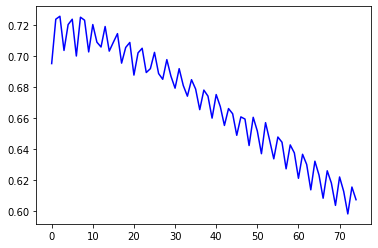

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

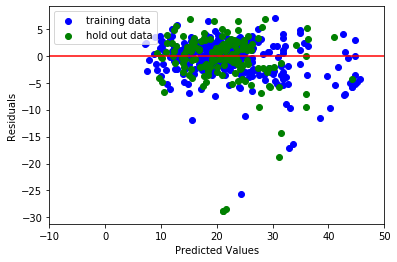

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [11]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.223785310734463
MSE train:  11.485112994350281
RMSE train:  3.388969311509073
r2:  0.9306559928106081
MAE test:  3.3196052631578943
MSE test:  30.101781578947367
RMSE test:  5.486509052115687
r2:  0.7922011589983392
